In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
from statsmodels.tsa.stattools import *
from statsmodels.graphics.tsaplots import*
import statsmodels.tsa.arima_model as arima
from matplotlib import pyplot

C:\Users\SERRA_R\AppData\Local\Continum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
file_name = 'data/WindAll_lat_longgfs_3_20180413_0000_000.grb2'+'.hdf'
dt = pd.read_hdf(file_name, 'Wind_vector')
dt.head()

,Wx,Wy,lat,long,level
0,2.141238,5.930576,90.5,-0.5,100.0
1,2.241238,5.890576,90.5,0.5,100.0
2,2.351238,5.850576,90.5,1.5,100.0
3,2.451238,5.810576,90.5,2.5,100.0
4,2.551238,5.760576,90.5,3.5,100.0


In [3]:
dt.describe()

,Wx,Wy,lat,long,level
count,2.019960e+06,2.019960e+06,2.019960e+06,2.019960e+06,2.019960e+06
mean,7.461291e+00,1.154384e-02,5.000000e-01,0.000000e+00,4.047742e+04
std,1.426042e+01,8.678099e+00,5.224941e+01,1.039227e+02,3.550799e+04
min,-4.416000e+01,-8.260003e+01,-8.950000e+01,-1.795000e+02,1.000000e+02
25%,-2.052356e+00,-3.800030e+00,-4.450000e+01,-8.975000e+01,3.000000e+03
50%,5.207492e+00,1.556445e-01,5.000000e-01,0.000000e+00,3.500000e+04
75%,1.525973e+01,4.069956e+00,4.550000e+01,8.975000e+01,7.500000e+04
max,8.864355e+01,7.159997e+01,9.050000e+01,1.795000e+02,1.000000e+05


In [4]:
np.shape(dt.level.unique())

(31,)

In [12]:
ab = dt.level.unique()
print(ab*0.3048)

[   30.48    60.96    91.44   152.4    213.36   304.8    609.6    914.4
  1524.    2133.6   3048.    4572.    6096.    7620.    9144.   10668.
 12192.   13716.   15240.   16764.   18288.   19812.   21336.   22860.
 24384.   25908.   27432.   28194.   28956.   29718.   30480.  ]


In [5]:
dt.corr()

,Wx,Wy,lat,long,level
Wx,1.000000,-0.022324,-1.957485e-01,-1.326385e-02,-2.709879e-01
Wy,-0.022324,1.000000,-2.666714e-04,3.603665e-02,3.866696e-03
lat,-0.195748,-0.000267,1.000000e+00,0.000000e+00,1.002603e-17
long,-0.013264,0.036037,0.000000e+00,1.000000e+00,3.588166e-19
level,-0.270988,0.003867,1.002603e-17,3.588166e-19,1.000000e+00


In [6]:
long = dt.long.unique()
lat = dt.lat.unique()
level = dt.level.unique()
#print('longitudes:', long)
#print('latitudes:', lat)
#print('levels',level)

# Statistical Analysis

## Longitudes

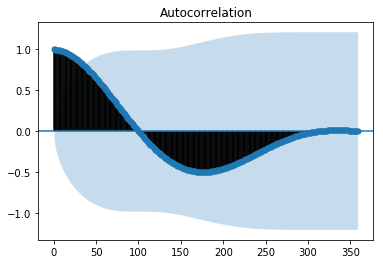

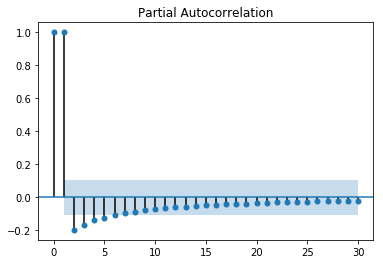

In [7]:
DT = dt
DT = DT.where(DT.level == level[0])
DT = DT.where(DT.lat == lat[0])
DT = DT.dropna(axis=0, how = 'all')
DT.describe()
x = DT.Wx
plot_acf(x)
plot_pacf(x, lags = 30)
pyplot.show()

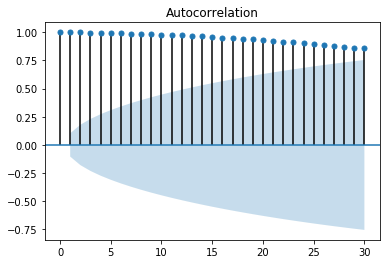

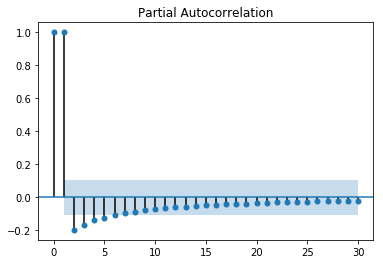

In [33]:
DT1 = dt
DT1 = DT.where(DT.level == level[0])
DT1 = DT.where(DT.lat == lat[90])
DT1 = DT.dropna(axis=0, how = 'all')
DT1.head()
x1 = DT1.Wx
plot_acf(x1, lags = 30)
plot_pacf(x1, lags = 30)
pyplot.show()

In [237]:
DT1.describe()

,Wx,Wy,lat,long,level
count,181.000000,181.000000,181.000000,181.0,181.0
mean,23.057260,-5.993623,0.500000,-0.5,100.0
std,13.899893,9.185682,52.394338,0.0,0.0
min,1.431238,-24.859423,-89.500000,-0.5,100.0
25%,16.521238,-8.269423,-44.500000,-0.5,100.0
50%,20.901237,-5.349424,0.500000,-0.5,100.0
75%,27.261238,0.030576,45.500000,-0.5,100.0
max,59.221237,8.220576,90.500000,-0.5,100.0


## Latitudes

In [239]:
DT = dt
DT = DT.where(DT.level == level[0])
DT = DT.where(DT.long == long[0])
DT = DT.dropna(axis=0, how = 'all')
x = DT.Wx

In [240]:
DT.describe()

,Wx,Wy,lat,long,level
count,181.000000,181.000000,181.000000,181.0,181.0
mean,23.057260,-5.993623,0.500000,-0.5,100.0
std,13.899893,9.185682,52.394338,0.0,0.0
min,1.431238,-24.859423,-89.500000,-0.5,100.0
25%,16.521238,-8.269423,-44.500000,-0.5,100.0
50%,20.901237,-5.349424,0.500000,-0.5,100.0
75%,27.261238,0.030576,45.500000,-0.5,100.0
max,59.221237,8.220576,90.500000,-0.5,100.0


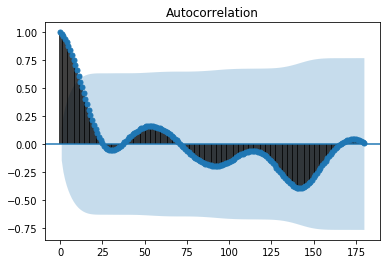

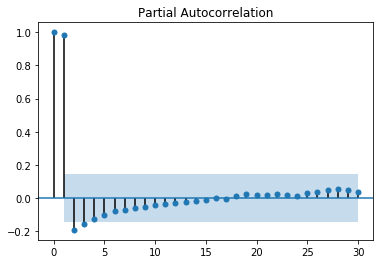

Other longitude


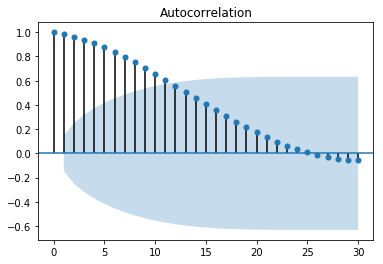

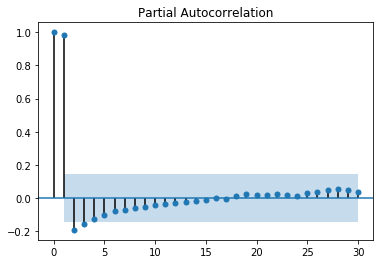

In [9]:
DT = dt
DT = DT.where(DT.level == level[0])
DT = DT.where(DT.long == long[0])
DT = DT.dropna(axis=0, how = 'all')
x = DT.Wx
plot_acf(x)
plot_pacf(x, lags = 30)
pyplot.show()

print('Other longitude')

DT1 = dt
DT1 = DT.where(DT.level == level[0])
DT1 = DT.where(DT.long == long[90])
DT1 = DT.dropna(axis=0, how = 'all')
DT1.head()
x1 = DT1.Wx
plot_acf(x1, lags = 30)
plot_pacf(x1, lags = 30)
pyplot.show()

## Levels

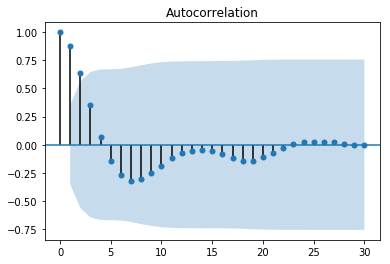

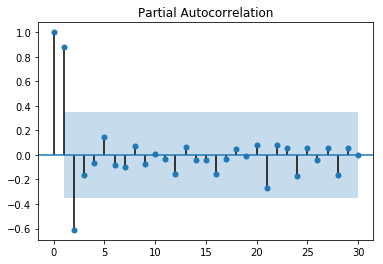

Other longitude and latitude


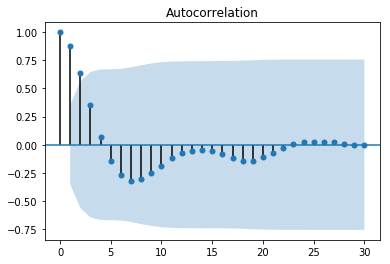

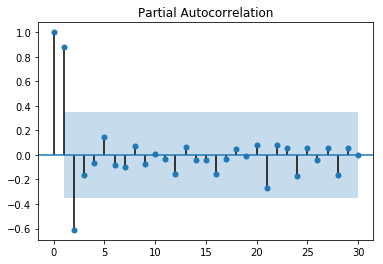

In [34]:
DT = dt
DT = DT.where(DT.lat == lat[0])
DT = DT.where(DT.long == long[0])
DT = DT.dropna(axis=0, how = 'all')
x = DT.Wx
plot_acf(x, lags = 30)
plot_pacf(x, lags = 30)
pyplot.show()

print('Other longitude and latitude')

DT1 = dt
DT1 = DT.where(DT.lat == lat[90])
DT1 = DT.where(DT.long == long[90])
DT1 = DT.dropna(axis=0, how = 'all')
DT1.head()
x1 = DT1.Wx
plot_acf(x1, lags = 30)
plot_pacf(x1, lags = 30)
pyplot.show()

## Temps

In [17]:
file_name = 'Wind' + 'test' + '.hdf'
dt1 = pd.read_hdf(file_name, 'Wind_vector')
DT = dt1

In [18]:
dt1.describe()

,Wx,Wy,lat,long,level,hour,day
count,60760.000000,60760.000000,60760.000000,60760.000000,60760.000000,60760.000000,60760.000000
mean,6.378601,4.150546,51.500000,2.000000,40477.419355,9.642857,14.285714
std,7.187043,6.489197,2.000016,2.872305,35508.271403,6.820269,1.030166
min,-32.369953,-36.755566,48.500000,-2.500000,100.000000,0.000000,13.000000
25%,2.152198,-0.120786,49.500000,-0.500000,3000.000000,3.000000,13.000000
50%,5.141594,3.976193,51.500000,2.000000,35000.000000,9.000000,14.000000
75%,10.823278,7.538276,53.500000,4.500000,75000.000000,15.000000,15.000000
max,39.600105,41.174206,54.500000,6.500000,100000.000000,21.000000,16.000000


In [19]:
dt1.corr()

,Wx,Wy,lat,long,level,hour,day
Wx,1.000000,-0.195322,-1.438108e-01,3.409263e-03,-3.644561e-01,1.148219e-01,2.389893e-01
Wy,-0.195322,1.000000,2.555787e-02,2.402599e-02,2.469332e-01,2.661340e-02,2.917791e-02
lat,-0.143811,0.025558,1.000000e+00,0.000000e+00,-5.989484e-18,-3.857954e-19,-1.702786e-19
long,0.003409,0.024026,0.000000e+00,1.000000e+00,-4.696555e-21,-1.492408e-21,0.000000e+00
level,-0.364456,0.246933,-5.989484e-18,-4.696555e-21,1.000000e+00,-1.931042e-16,-1.368589e-15
hour,0.114822,0.026613,-3.857954e-19,-1.492408e-21,-1.931042e-16,1.000000e+00,-2.091389e-01
day,0.238989,0.029178,-1.702786e-19,0.000000e+00,-1.368589e-15,-2.091389e-01,1.000000e+00


In [20]:
long1 = dt1.long.unique()
lat1 = dt1.lat.unique()
level1 = dt1.level.unique()
#print('longitudes:', long1)
#print('latitudes:', lat1)
#print('levels',level1)

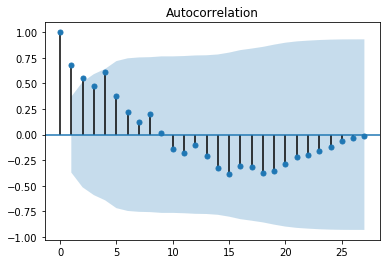

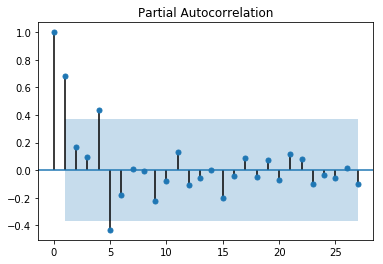

Other longitude and latitude


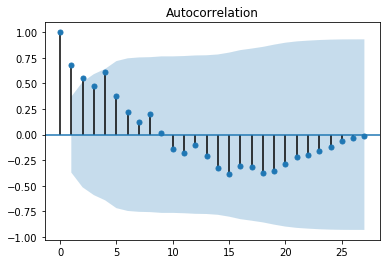

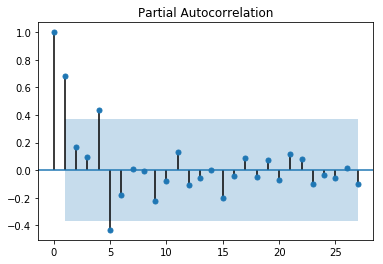

In [21]:
DT = dt1
DT = DT.where(DT.lat == lat1[0])
DT = DT.where(DT.long == long1[0])
DT = DT.where(DT.level == level1[0])
DT = DT.dropna(axis=0, how = 'all')
x = DT.Wx
#DT.head()
plot_acf(x)
plot_pacf(x)
pyplot.show()


print('Other longitude and latitude')

DT1 = dt1
DT1 = DT.where(DT.lat == lat[3])
DT1 = DT.where(DT.long == long[3])
DT1 = DT.dropna(axis=0, how = 'all')
DT1.head()
x1 = DT1.Wx
plot_acf(x1)
plot_pacf(x1)
pyplot.show()